In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing cost data sets

staff_d = pd.read_csv('staff_costs.csv')
sub_d=pd.read_csv('subcontractor_costs.csv')
consum_d=pd.read_csv('consumables_costs.csv')
soft_d=pd.read_csv('software_costs.csv')

In [3]:
#Creating sum of each cif and year per cost bracket, and adding them for the total costs.

staff_cost = staff_d.set_index(['Cif', 'ye'])['costs']
staff_app = staff_d.set_index(['Cif', 'ye'])['pct']
staff_rd_cost=staff_cost.mul(staff_app/100)
staff_cost_groupby=staff_rd_cost.groupby(['Cif', 'ye']).sum()
staff_cost_sum=pd.DataFrame(staff_cost_groupby)

sub_cost = sub_d.set_index(['Cif', 'ye'])['costs']
sub_app = sub_d.set_index(['Cif', 'ye'])['pct']
sub_rd_cost=sub_cost.mul(sub_app/100)
sub_cost_groupby=sub_rd_cost.groupby(['Cif', 'ye']).sum()
sub_cost_sum=pd.DataFrame(sub_cost_groupby)

consum_cost = consum_d.set_index(['Cif', 'ye'])['costs']
consum_app = consum_d.set_index(['Cif', 'ye'])['pct']
consum_rd_cost=consum_cost.mul(consum_app/100)
consum_cost_groupby=consum_rd_cost.groupby(['Cif', 'ye']).sum()
consum_cost_sum=pd.DataFrame(consum_cost_groupby)

    
soft_cost = soft_d.set_index(['Cif', 'ye'])['costs']
soft_app = soft_d.set_index(['Cif', 'ye'])['pct']
soft_rd_cost=soft_cost.mul(soft_app/100)
soft_cost_groupby=soft_rd_cost.groupby(['Cif', 'ye']).sum()
soft_cost_sum=pd.DataFrame(soft_cost_groupby)



all_costs=pd.concat([staff_cost_sum, sub_cost_sum, consum_cost_sum, soft_cost_sum]).sum(level=['Cif','ye'])
all_costs.reset_index(inplace=True)

In [4]:
#importing client data

import re
all_d_spread = pd.read_csv('RD All Data Sheet 2018xxx.csv')
all_d_spread[['CIFNo', 'Expr1', 'Claim Phase', 'DateReceived', 'PostCode', 'R&D Claim Name', 'Claim Status']]

yy_regex=re.compile(r'\d{2}$')

all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].str.strip()
all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].astype(str)
all_d_spread['yydd']=all_d_spread['R&D Claim Name'].str.findall(yy_regex)
all_d_spread['yydd']=all_d_spread['yydd'].astype(str).str.replace('\[|\]|\'', '')
clientdata=all_d_spread[all_d_spread.yydd != '']
clientdata=clientdata[clientdata['Claim Status'] == 'Paid']
clientdata['yydd']=clientdata['yydd'].astype(str)
clientdata['CIFNo']=clientdata['CIFNo'].astype(str)

all_costs['Cif']=all_costs['Cif'].astype(str)
all_costs['ye']=all_costs['ye'].astype(str)

staff_cost_mean=staff_rd_cost.groupby(['Cif', 'ye']).mean()
app_means=staff_d.groupby(['Cif', 'ye'])['pct'].mean()
app_counts=staff_rd_cost.groupby(['Cif', 'ye']).count()

merged_data=pd.merge(all_costs, clientdata, how='left', left_on=['Cif', 'ye'], right_on=['CIFNo', 'yydd'])


all_d=merged_data[['Cif', 'ye', 'Expr1', 'Claim Phase', 'DateReceived', 'ReportSubmitted', 'PostCode', 0, 'Industry','CIF_Employees', 'CIF_Turnover']]
all_d.dropna(how='any', axis=0, inplace=True)
all_d[all_d.columns]=all_d.applymap(lambda x: x.strip() if type(x) is str else x)
all_d['Cif']=all_d['Cif'].astype(np.int64)
all_d['ye']=all_d['ye'].astype(np.int64)

#Postcode preprocessing
postcode_regex=re.compile(r'^\D{1,}')
all_d.PostCode=all_d.PostCode.str.findall(postcode_regex)
all_d.PostCode=all_d.PostCode.astype(str).str.replace('\[|\]|\'', '')

C:\Users\Iwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,31,32,37,70,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 


In [5]:
al_staff=pd.merge(all_d.reset_index(), staff_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_sub=pd.merge(al_staff.reset_index(), sub_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_consum=pd.merge(al_sub.reset_index(), consum_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_soft=pd.merge(al_consum.reset_index(), soft_cost_sum.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
al_soft


index      Expr1 Claim Phase      DateReceived   ReportSubmitted  \
Cif  ye                                                                     
277  13      0   December    Phase 02  21/11/2013 00:00  22/08/2014 00:00   
     14      1   December    Phase 03  21/11/2013 00:00  29/02/2016 00:00   
     15      2   December    Phase 04  21/11/2013 00:00  04/03/2016 00:00   
312  13      3    January    Phase 01  13/05/2014 00:00  12/09/2014 00:00   
361  16      6      March    Phase 03  25/04/2014 00:00  17/01/2017 00:00   
403  13      9      March    Phase 01  08/05/2014 00:00  30/06/2014 00:00   
     14     10      March    Phase 01  08/05/2014 00:00  18/11/2014 00:00   
     15     11      March    Phase 02  08/05/2014 00:00  18/02/2016 00:00   
     16     12      March    Phase 03  08/05/2014 00:00  11/11/2016 00:00   
415  15     14   December    Phase 03  12/05/2014 00:00  12/09/2016 00:00   
421  12     16       July    Phase 01  15/05/2014 00:00  31/07/2014 00:00   
     14     17       July    Phase 02  15/05/2014 00:00  21/08/2015 00:00   
     15     18       July    Phase 03  15/05/2014 00:00  27/08/2015 00:00   
427  13     19   December    Phase 01  22/05/2014 00:00  28/11/2014 00:00   
     14     20   December    Phase 02  22/05/2014 00:00  24/08/2015 00:00   
451  12     23       June    Phase 01  04/06/2014 00:00  30/06/2014 00:00   
     13     24       June    Phase 01  04/06/2014 00:00  23/10/2014 00:00   
     15     25       June    Phase 03  04/06/2014 00:00  10/06/2016 00:00   
463  12     26  September    Phase 01  05/06/2014 00:00  30/09/2014 00:00   
     14     27  September    Phase 02  05/06/2014 00:00  31/12/2014 00:00   
495  15     30      March    Phase 01  02/12/2014 00:00  21/03/2016 00:00   
496  13     31   February    Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     14     32   February    Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     15     33   February    Phase 02  25/06/2014 00:00  18/03/2016 00:00   
     16     34   February    Phase 03  25/06/2014 00:00  21/02/2017 00:00   
501  13     35      March    Phase 01  04/07/2014 00:00  26/11/2014 00:00   
     14     36      March    Phase 01  04/07/2014 00:00  25/11/2014 00:00   
502  12     37    January    Phase 01  08/07/2014 00:00  18/09/2014 00:00   
504  14     38  September    Phase 01  10/07/2014 00:00  05/08/2015 00:00   
505  13     39       June    Phase 02  11/07/2014 00:00  14/10/2014 00:00   
...        ...        ...         ...               ...               ...   
3850 15   1897     August    Phase 01  31/03/2017 00:00  31/08/2017 00:00   
     16   1898     August    Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3851 16   1899     August    Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3855 15   1900       July    Phase 01  03/04/2017 00:00  04/05/2017 00:00   
     16   1901       July    Phase 01  03/04/2017 00:00  04/05/2017 00:00   
3856 15   1902  September    Phase 01  03/04/2017 00:00  30/05/2017 00:00   
3863 15   1906     August    Phase 01  10/04/2017 00:00  31/08/2017 00:00   
     16   1907     August    Phase 01  10/04/2017 00:00  31/08/2017 00:00   
3866 15   1908      April    Phase 01  10/04/2017 00:00  30/04/2017 00:00   
     16   1909      April    Phase 01  10/04/2017 00:00  30/04/2017 00:00   
3883 15   1919     August    Phase 01  24/04/2017 00:00  31/05/2017 00:00   
     16   1920     August    Phase 01  24/04/2017 00:00  31/05/2017 00:00   
3907 15   1923       June    Phase 01  03/05/2017 00:00  30/06/2017 00:00   
     16   1924       June    Phase 01  03/05/2017 00:00  30/06/2017 00:00   
3929 17   1930      March    Phase 01  17/05/2017 00:00  14/11/2017 00:00   
3987 16   1946       July    Phase 01  01/06/2017 00:00  26/09/2017 00:00   
4032 17   1964      April    Phase 01  22/06/2017 00:00  31/08/2017 00:00   
4082 15   1982  September    Phase 01  07/07/2017 00:00  29/09/2017 00:00   
4098 16   1987      March    Phase 01  11/07/2017 00:00  29/09/2017 00:00   
     

In [6]:
staff_cost_count=staff_rd_cost.groupby(['Cif', 'ye']).count()
sub_cost_count=sub_rd_cost.groupby(['Cif', 'ye']).count()
consum_cost_count=consum_rd_cost.groupby(['Cif', 'ye']).count()
soft_cost_count=soft_rd_cost.groupby(['Cif', 'ye']).count()

al_soft.columns=['?', 'Month', 'Phase','Received', 'Completed', 'PostCode', 'Total_Costs', 'Industry','CIF_Employees', 'CIF_Turnover', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs']
count_al_staff=pd.merge(al_soft.reset_index(), staff_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
count_al_sub=pd.merge(count_al_staff.reset_index(), sub_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
count_al_consum=pd.merge(count_al_sub.reset_index(), consum_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
count_al_soft=pd.merge(count_al_consum.reset_index(), soft_cost_count.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])

staff_app_median=staff_app.groupby(['Cif', 'ye']).median()
app_al_staff=pd.merge(count_al_soft.reset_index(), staff_app_median.reset_index(), on=['Cif', 'ye'], how='left').set_index(['Cif','ye'])
app_al_staff.iloc[:,0:20]

?      Month     Phase          Received         Completed  \
Cif  ye                                                                  
277  13     0   December  Phase 02  21/11/2013 00:00  22/08/2014 00:00   
     14     1   December  Phase 03  21/11/2013 00:00  29/02/2016 00:00   
     15     2   December  Phase 04  21/11/2013 00:00  04/03/2016 00:00   
312  13     3    January  Phase 01  13/05/2014 00:00  12/09/2014 00:00   
361  16     6      March  Phase 03  25/04/2014 00:00  17/01/2017 00:00   
403  13     9      March  Phase 01  08/05/2014 00:00  30/06/2014 00:00   
     14    10      March  Phase 01  08/05/2014 00:00  18/11/2014 00:00   
     15    11      March  Phase 02  08/05/2014 00:00  18/02/2016 00:00   
     16    12      March  Phase 03  08/05/2014 00:00  11/11/2016 00:00   
415  15    14   December  Phase 03  12/05/2014 00:00  12/09/2016 00:00   
421  12    16       July  Phase 01  15/05/2014 00:00  31/07/2014 00:00   
     14    17       July  Phase 02  15/05/2014 00:00  21/08/2015 00:00   
     15    18       July  Phase 03  15/05/2014 00:00  27/08/2015 00:00   
427  13    19   December  Phase 01  22/05/2014 00:00  28/11/2014 00:00   
     14    20   December  Phase 02  22/05/2014 00:00  24/08/2015 00:00   
451  12    23       June  Phase 01  04/06/2014 00:00  30/06/2014 00:00   
     13    24       June  Phase 01  04/06/2014 00:00  23/10/2014 00:00   
     15    25       June  Phase 03  04/06/2014 00:00  10/06/2016 00:00   
463  12    26  September  Phase 01  05/06/2014 00:00  30/09/2014 00:00   
     14    27  September  Phase 02  05/06/2014 00:00  31/12/2014 00:00   
495  15    30      March  Phase 01  02/12/2014 00:00  21/03/2016 00:00   
496  13    31   February  Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     14    32   February  Phase 01  25/06/2014 00:00  17/02/2015 00:00   
     15    33   February  Phase 02  25/06/2014 00:00  18/03/2016 00:00   
     16    34   February  Phase 03  25/06/2014 00:00  21/02/2017 00:00   
501  13    35      March  Phase 01  04/07/2014 00:00  26/11/2014 00:00   
     14    36      March  Phase 01  04/07/2014 00:00  25/11/2014 00:00   
502  12    37    January  Phase 01  08/07/2014 00:00  18/09/2014 00:00   
504  14    38  September  Phase 01  10/07/2014 00:00  05/08/2015 00:00   
505  13    39       June  Phase 02  11/07/2014 00:00  14/10/2014 00:00   
...       ...        ...       ...               ...               ...   
3850 15  1897     August  Phase 01  31/03/2017 00:00  31/08/2017 00:00   
     16  1898     August  Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3851 16  1899     August  Phase 01  31/03/2017 00:00  31/08/2017 00:00   
3855 15  1900       July  Phase 01  03/04/2017 00:00  04/05/2017 00:00   
     16  1901       July  Phase 01  03/04/2017 00:00  04/05/2017 00:00   
3856 15  1902  September  Phase 01  03/04/2017 00:00  30/05/2017 00:00   
3863 15  1906     August  Phase 01  10/04/2017 00:00  31/08/2017 00:00   
     16  1907     August  Phase 01  10/04/2017 00:00  31/08/2017 00:00   
3866 15  1908      April  Phase 01  10/04/2017 00:00  30/04/2017 00:00   
     16  1909      April  Phase 01  10/04/2017 00:00  30/04/2017 00:00   
3883 15  1919     August  Phase 01  24/04/2017 00:00  31/05/2017 00:00   
     16  1920     August  Phase 01  24/04/2017 00:00  31/05/2017 00:00   
3907 15  1923       June  Phase 01  03/05/2017 00:00  30/06/2017 00:00   
     16  1924       June  Phase 01  03/05/2017 00:00  30/06/2017 00:00   
3929 17  1930      March  Phase 01  17/05/2017 00:00  14/11/2017 00:00   
3987 16  1946       July  Phase 01  01/06/2017 00:00  26/09/2017 00:00   
4032 17  1964      April  Phase 01  22/06/2017 00:00  31/08/2017 00:00   
4082 15  1982  September  Phase 01  07/07/2017 00:00  29/09/2017 00:00   
4098 16  1987      March  Phase 01  11/07/2017 00:00  29/09/2017 00:00   
     16  1988  September  Phase 01  11/07/2017 00:00  29/09/2017 00:00   
4132 16  2005   February  Phase 01  24/07/2017 00:00  21/11/2017 00:00   
     17  2006   

In [7]:
app_al_staff.columns=['?', 'Month', 'Phase','Received', 'Completed', 'PostCode', 'Total_Costs', 'Industry','CIF_Employees', 'CIF_Turnover', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs', 'Num_Staff', 'Num_Subs', 'Num_Materials', 'Num_Software', 'Staff_pct']
all_data=app_al_staff[['Month', 'Phase','PostCode', 'Industry','Received', 'Completed', 'Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs', 'Num_Staff', 'Num_Subs', 'Num_Materials', 'Num_Software', 'Staff_pct','CIF_Employees', 'CIF_Turnover']]
all_data.iloc[:,0:15]

Month     Phase PostCode                                Industry  \
Cif  ye                                                                         
277  13   December  Phase 02        L                  Mechanical Engineering   
     14   December  Phase 03        L                  Mechanical Engineering   
     15   December  Phase 04        L                  Mechanical Engineering   
312  13    January  Phase 01       LL                            Food & Drink   
361  16      March  Phase 03       RM                            Horticulture   
403  13      March  Phase 01       EN                     Wholesalers/Imports   
     14      March  Phase 01       EN                     Wholesalers/Imports   
     15      March  Phase 02       EN                     Wholesalers/Imports   
     16      March  Phase 03       EN                     Wholesalers/Imports   
415  15   December  Phase 03        N                            Construction   
421  12       July  Phase 01       GU          Management/Consulting/Training   
     14       July  Phase 02       GU          Management/Consulting/Training   
     15       July  Phase 03       GU          Management/Consulting/Training   
427  13   December  Phase 01       ME          Management/Consulting/Training   
     14   December  Phase 02       ME          Management/Consulting/Training   
451  12       June  Phase 01       OL  Printing/Publishing/Literature Binding   
     13       June  Phase 01       OL  Printing/Publishing/Literature Binding   
     15       June  Phase 03       OL  Printing/Publishing/Literature Binding   
463  12  September  Phase 01       CM             Ventilation/Window Services   
     14  September  Phase 02       CM             Ventilation/Window Services   
495  15      March  Phase 01        M                  Plastic/Glass Moulding   
496  13   February  Phase 01       SA                  Mechanical Engineering   
     14   February  Phase 01       SA                  Mechanical Engineering   
     15   February  Phase 02       SA                  Mechanical Engineering   
     16   February  Phase 03       SA                  Mechanical Engineering   
501  13      March  Phase 01        L                     Wholesalers/Imports   
     14      March  Phase 01        L                            Food & Drink   
502  12    January  Phase 01       OL                  Mechanical Engineering   
504  14  September  Phase 01       WA                      Telecommunications   
505  13       June  Phase 02       BL                                  Dental   
...            ...       ...      ...                                     ...   
3850 15     August  Phase 01       SE          Management/Consulting/Training   
     16     August  Phase 01       SE          Management/Consulting/Training   
3851 16     August  Phase 01       SE          Management/Consulting/Training   
3855 15       July  Phase 01       NP          Management/Consulting/Training   
     16       July  Phase 01       NP          Management/Consulting/Training   
3856 15  September  Phase 01       SY                           Manufacturing   
3863 15     August  Phase 01       SO          Management/Consulting/Training   
     16     August  Phase 01       SO          Management/Consulting/Training   
3866 15      April  Phase 01       BD                           Manufacturing   
     16      April  Phase 01       BD                           Manufacturing   
3883 15     August  Phase 01       LN                          Motor Industry   
     16     August  Phase 01       LN                          Motor Industry   
3907 15       June  Phase 01       PR                           Manufacturing   
     16       June  Phase 01       PR                           Manufacturing   
3929 17      March  Phase 01        Y                                  Retail   
3987 16       July  Phase 01       SW                           Manufacturing   
4032 17      April  Phase 01        M       

In [8]:
all_costs['Cif']=all_costs['Cif'].astype(np.int64)
all_costs['ye']=all_costs['ye'].astype(np.int64)

def cost_append(cost, df):
    cost_total=cost.groupby(['Cif', 'ye']).sum()
    payroll=pd.merge(df.reset_index(), cost_total.reset_index(), on=['Cif', 'ye'], how='left')
    return payroll


reset_costs=all_data
#payroll of relevant staff members Pearson correlation coefficient.
staff=cost_append(staff_cost, reset_costs)
subs=cost_append(sub_cost, staff)
consum=cost_append(consum_cost, subs)
consum.drop(['level_0', 'index'],axis=1, inplace=True)
soft=cost_append(soft_cost, consum)

soft.drop(['index'],axis=1, inplace=True)

In [9]:
soft.set_index(['Cif', 'ye'], inplace=True)

In [10]:

soft.columns=['Month', 'Phase','PostCode', 'Industry','Received', 'Completed', 'Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs', 'Num_Staff', 'Num_Subs', 'Num_Materials', 'Num_Software', 'Staff_pct','CIF_Employees', 'CIF_Turnover', 'Staff_Payroll', 'Sub_Payroll', 'Material_Payroll', 'Software_Payroll']
all_data=soft


In [11]:
all_data['Received'] = pd.to_datetime(all_data['Received'])    
all_data['Received'] = (all_data['Received'] - all_data['Received'].min())  / np.timedelta64(1,'D')
all_data['Completed'] = pd.to_datetime(all_data['Completed'])    
all_data['Completed'] = (all_data['Completed'] - all_data['Completed'].min())  / np.timedelta64(1,'D')

In [12]:
all_data=pd.get_dummies(all_data, drop_first=True)
all_data.fillna(value=0, inplace=True)
all_data

Received  Completed    Total_Costs    Staff_Costs  \
Cif  ye                                                      
277  13       0.0       53.0  519297.676200  444597.411500   
     14       0.0      609.0  770372.973000  484438.682500   
     15       0.0      643.0   63046.854000       0.000000   
312  13     173.0      162.0   21292.546058   21292.546058   
361  16     155.0      932.0   39805.490000   35333.400000   
403  13     257.0        0.0   42309.500000   42309.500000   
     14     257.0      141.0   42309.500000   42309.500000   
     15     257.0      598.0   90340.543000   47163.157000   
     16     257.0      865.0   90279.302249   32105.359396   
415  15     379.0      893.0   53406.449503   41819.334670   
421  12     175.0       31.0   35119.132000   33013.232000   
     14     175.0      417.0  113258.000000   53569.280000   
     15     175.0      423.0   78315.243000   59749.280000   
427  13     182.0      151.0   11638.529400   10955.394400   
     14     182.0      420.0   32561.967000   16819.652000   
451  12     136.0        0.0   22666.236500   22666.236500   
     13     136.0      115.0   33055.162800   28855.162800   
     15     136.0      829.0   36179.997500   35635.717500   
463  12     166.0       92.0    2183.359200    2183.359200   
     14     166.0      184.0  177389.642900  104003.959400   
495  15      83.0      630.0   13879.229737   12629.229737   
496  13     216.0      232.0   85327.981500   54000.751500   
     14     216.0      232.0  100082.073000   57289.813000   
     15     216.0      627.0  118281.971000   68386.621000   
     16     216.0      967.0  141204.507542   99141.381500   
501  13     137.0      149.0   11221.104000    9988.304000   
     14     137.0      148.0   21320.449000   20364.829000   
502  12     259.0       80.0   78628.240000   52651.240000   
504  14     320.0      312.0  146819.352600  146269.352600   
505  13     351.0      106.0   85842.900000   65690.400000   
...           ...        ...            ...            ...   
3850 15    1226.0     1158.0    4375.067191    4355.147687   
     16    1226.0     1158.0    6914.012359    6888.075769   
3851 16    1226.0     1158.0    6069.433482    5941.429482   
3855 15    1199.0     1010.0   74817.929998   74817.929998   
     16    1199.0     1010.0   69546.888611   69546.888611   
3856 15    1199.0     1065.0   51491.504244   48654.714000   
3863 15    1413.0     1158.0   37068.733624   37068.733624   
     16    1413.0     1158.0   82899.798085   72411.805978   
3866 15    1413.0     1035.0   18739.233500   18739.233500   
     16    1413.0     1035.0   23831.434000   23831.434000   
3883 15    1250.0     1066.0   47666.360500   47638.760500   
     16    1250.0     1066.0   65668.459500   65512.399500   
3907 15    1200.0     1096.0    2368.899000       0.000000   
     16    1200.0     1096.0    1828.242000       0.000000   
3929 17    1273.0     1233.0   16966.970588   16848.250000   
3987 16    1142.0     1184.0   18303.701520       0.000000   
4032 17    1309.0     1158.0   23434.798500    2569.792000   
4082 15    1324.0     1187.0   36338.476000   27534.816000   
4098 16    1447.0     1187.0  274640.971600  274069.894000   
     16    1447.0     1187.0  274640.971600  274069.894000   
4132 16    1341.0     1240.0   11440.644000   11322.774000   
     17    1341.0     1240.0   13300.577999   13165.427999   
4225 15    1369.0     1246.0   14482.860250    5872.164000   
     16    1369.0     1246.0   19396.966500    8504.119000   
4267 15    1379.0     1136.0   10699.054400   10699.054400   
4305 15    1400.0     1187.0   22849.112000   15344.000000   
     16    1400.0     1187.0   31644.607500   22494.000000   
4392 15    1425.0     1268.0   67962.798000   45545.058000   
4409 15    1429.0     1247.0   28051.830694   27511.806500   
     16    1429.0     1247.0   27488.078323   26924.163000   

         Subcontractor_Costs  Material_Costs  Software_Costs  Num_Staff  \
Cif  ye                    

In [13]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('Total_Costs ~ Staff_Costs',all_data).fit()
print(m.summary())

C:\Users\Iwan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:            Total_Costs   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     4098.
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:32:48   Log-Likelihood:                -20726.
No. Observations:                1678   AIC:                         4.146e+04
Df Residuals:                    1676   BIC:                         4.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.472e+04   1632.734      9.016      

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
y = all_data.Total_Costs
# This creates a LinearRegression object
lm = LinearRegression()
lm

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
y = all_data.Total_Costs
# This creates a LinearRegression object
lm = RandomForestRegressor(n_estimators=20, random_state=0)
lm

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [15]:
lm.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [16]:
cv_scores = cross_val_score(lm, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.59667163  0.70578499  0.53593282  0.71997343  0.78343993]
Average 5-Fold CV Score: 0.6683605605085882


In [17]:
# Perform 3-fold CV
cv_scores3 = cross_val_score(lm, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(lm, X, y, cv=10)
print(np.mean(cv_scores10))

0.63019534758
0.667707329688


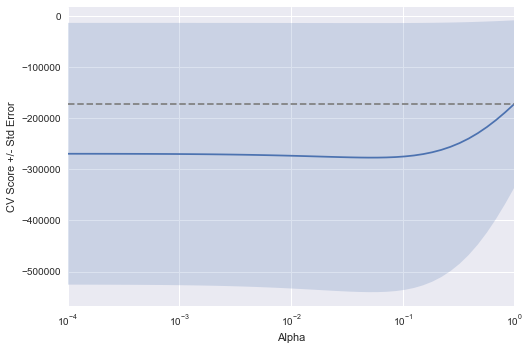

In [18]:
#observing which alpha to select in scoring
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


coeffs=pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(coeffs)

In [19]:
lm.predict(X)[0:5]

array([ 469452.80123167,  647108.57872804,   53067.545575  ,
         22736.85230255,   35831.52821444])

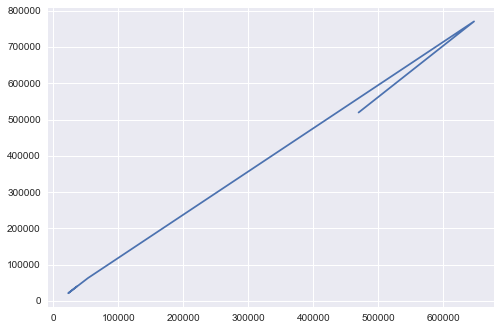

In [20]:
plt.plot(lm.predict(X)[0:5], all_data.Total_Costs.head(5))
plt.show()

In [21]:
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar

0.96573007788173648

In [22]:
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     40.26
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:55:18   Log-Likelihood:                -20561.
No. Observations:                1678   AIC:                         4.151e+04
Df Residuals:                    1486   BIC:                         4.255e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Received                                           -3.2339      9.591     -0.337      0.736     -22.046      15.579
Completed                                           1.0386      9.684      0.107      0.915     -17.958      20.035
Num_Staff                                        1353.8335    438.590      3.087      0.002     493.513    2214.154
Num_Subs                                         5760.8365    619.342      9.302      0.000    4545.958    6975.715
Num_Materials                                    8294.7862   1112.205      7.458      0.000    6113.127    1.05e+04
Num_Software                                    -1293.0112   2297.326     -0.563      0.574   -5799.357    3213.335
Staff_pct                                         994.1408     63.940     15.548      0.000     868.718    1119.564
CIF_Employees                                      -0.0037      0.006     -0.598      0.550      -0.016       0.009
CIF_Turnover                                        0.0007   8.26e-05      8.206      0.000       0.001       0.001
Staff_Payroll                                       0.1924      0.013     14.694      0.000       0.167       0.218
Sub_Payroll                                         0.2608      0.022     11.797      0.000       0.217       0.304
Material_Payroll                                    0.0215      0.002      8.843      0.000       0.017       0.026
Software_Payroll                                    1.1681      0.084     13.828      0.000       1.002       1.334
Month_August                                     1.035e+04   7852.246      1.318      0.188   -5055.827    2.57e+04
Month_December                                   1.138e+04   6255.680      1.819      0.069    -890.123    2.37e+04
Month_February                                   6213.4986   8980.520      0.692      0.489   -1.14e+04    2.38e+04
Month_January                                   -3692.0249   8857.123     -0.417      0.677   -2.11e+04    1.37e+04
Month_July                                      -5456.4898   9486.289     -0.575      0.565   -2.41e+04    1.32e+04
Month_June                                        660.6515   7248.367      0.091      0.927   -1.36e+04    1.49e+04
Month_March                                      1547.8554   5970.097      0.259      0.795   -1.02e+04    1.33e+04
Month_May                                        1.271e+04   8415.051      1.510      0.131   -3800.576    2.92e+04
Month_November                                   6150.2071   9331.824      0.659      0.510   -1.22e+04    2.45e+04
Month_October                                   -1.001e+04   8899.979     -1.125      0.261   -2.75e+04    7447.916
Month_September                                 -2290.2333   7284.0

# dropping large p values

In [23]:
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
X = X.drop(['CIF_Employees', 'Received', 'Completed', 'Phase_Phase 02', 'Phase_Phase 03', 'Phase_Phase 04', 'Phase_Phase 05'], axis=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
y = all_data.Total_Costs
# This creates a LinearRegression object
lm = RandomForestRegressor(n_estimators=20, random_state=0)
lm
lm.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [24]:
cv_scores = cross_val_score(lm, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.60162511  0.70451478  0.53870993  0.72550394  0.81434754]
Average 5-Fold CV Score: 0.6769402605249876


In [25]:
# Perform 3-fold CV
cv_scores3 = cross_val_score(lm, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(lm, X, y, cv=10)
print(np.mean(cv_scores10))

0.642451476343
0.647176754518


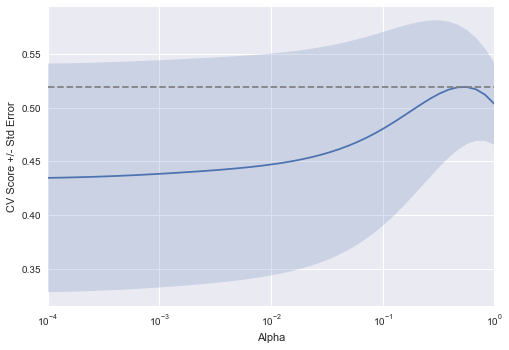

In [26]:
#observing which alpha to select in scoring
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


coeffs=pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(coeffs)

In [27]:
lm.predict(X)[0:5]

array([ 467005.94214417,  658033.72082607,   53297.850325  ,
         26407.549354  ,   36010.98979999])

In [28]:
all_data.Total_Costs.head(5)

Cif  ye
277  13    519297.676200
     14    770372.973000
     15     63046.854000
312  13     21292.546058
361  16     39805.490000
Name: Total_Costs, dtype: float64

In [29]:
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar

0.97490309681627529

In [30]:
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     41.90
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:17:46   Log-Likelihood:                -20562.
No. Observations:                1678   AIC:                         4.149e+04
Df Residuals:                    1493   BIC:                         4.250e+04
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Num_Staff                                        1364.6097    437.267      3.121      0.002     506.887    2222.332
Num_Subs                                         5737.0425    613.963      9.344      0.000    4532.721    6941.364
Num_Materials                                    8324.0519   1098.330      7.579      0.000    6169.618    1.05e+04
Num_Software                                    -1348.2841   2292.863     -0.588      0.557   -5845.859    3149.291
Staff_pct                                         993.8147     63.742     15.591      0.000     868.782    1118.847
CIF_Turnover                                        0.0007   8.24e-05      8.199      0.000       0.001       0.001
Staff_Payroll                                       0.1922      0.013     14.742      0.000       0.167       0.218
Sub_Payroll                                         0.2620      0.022     11.903      0.000       0.219       0.305
Material_Payroll                                    0.0214      0.002      8.844      0.000       0.017       0.026
Software_Payroll                                    1.1676      0.084     13.861      0.000       1.002       1.333
Month_August                                     1.013e+04   7827.118      1.294      0.196   -5221.663    2.55e+04
Month_December                                   1.196e+04   6231.303      1.919      0.055    -265.090    2.42e+04
Month_February                                   6352.1662   8960.906      0.709      0.479   -1.12e+04    2.39e+04
Month_January                                   -3496.8583   8792.504     -0.398      0.691   -2.07e+04    1.38e+04
Month_July                                      -5293.7002   9449.897     -0.560      0.575   -2.38e+04    1.32e+04
Month_June                                        935.1424   7219.001      0.130      0.897   -1.32e+04    1.51e+04
Month_March                                      1585.9145   5953.782      0.266      0.790   -1.01e+04    1.33e+04
Month_May                                        1.256e+04   8398.185      1.496      0.135   -3912.663     2.9e+04
Month_November                                   6215.4173   9312.280      0.667      0.505   -1.21e+04    2.45e+04
Month_October                                   -9854.6248   8869.365     -1.111      0.267   -2.73e+04    7543.114
Month_September                                 -1991.8844   7259.777     -0.274      0.784   -1.62e+04    1.22e+04
PostCode_AL                                     -3.485e+04   2.89e+04     -1.205      0.229   -9.16e+04    2.19e+04
PostCode_B                                      -3.104e+04   1.92e+04     -1.614      0.107   -6.88e+04    6694.130
PostCode_BA                                     -5.016e+04   1.92e+

In [65]:
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
X = X.drop(['CIF_Employees', 'Received', 'Completed', 'Phase_Phase 02', 'Phase_Phase 03', 'Phase_Phase 04', 'Phase_Phase 05'], axis=1)
X = X.drop(['Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September'], axis=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
y = all_data.Total_Costs
# This creates a LinearRegression object
lm = RandomForestRegressor(n_estimators=20, random_state=0)
lm
lm.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [32]:
cv_scores = cross_val_score(lm, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.6418322   0.69174132  0.5495108   0.71602858  0.81749015]
Average 5-Fold CV Score: 0.6833206080101581


In [33]:
# Perform 3-fold CV
cv_scores3 = cross_val_score(lm, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(lm, X, y, cv=10)
print(np.mean(cv_scores10))

0.665081795761
0.651674865222


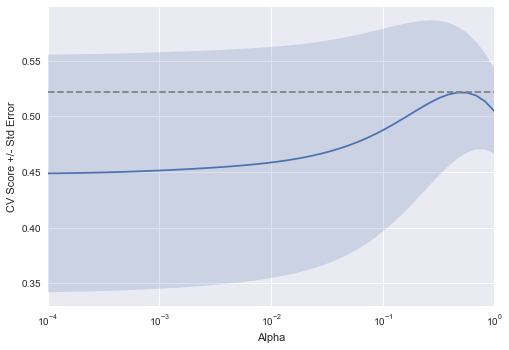

In [34]:
#observing which alpha to select in scoring
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


coeffs=pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(coeffs)

In [35]:
lm.predict(X)[0:5]

array([ 469001.10641565,  649854.1442569 ,   53616.30445   ,
         27960.179669  ,   35312.244885  ])

In [61]:
all_data.iloc[0:5,2:35]

Total_Costs    Staff_Costs  Subcontractor_Costs  Material_Costs  \
Cif ye                                                                      
277 13  519297.676200  444597.411500           64887.9647         512.300   
    14  770372.973000  484438.682500          148340.1075      137594.183   
    15   63046.854000       0.000000           63046.8540           0.000   
312 13   21292.546058   21292.546058               0.0000           0.000   
361 16   39805.490000   35333.400000               0.0000        4472.090   

        Software_Costs  Num_Staff  Num_Subs  Num_Materials  Num_Software  \
Cif ye                                                                     
277 13          9300.0       15.0       6.0            1.0           1.0   
    14             0.0       17.0       8.0            5.0           0.0   
    15             0.0        0.0       1.0            0.0           0.0   
312 13             0.0        7.0       0.0            0.0           0.0   
361 16             0.0        6.0       0.0            2.0           0.0   

        Staff_pct     ...      Month_May  Month_November  Month_October  \
Cif ye                ...                                                 
277 13       45.0     ...              0               0              0   
    14       25.0     ...              0               0              0   
    15        0.0     ...              0               0              0   
312 13       25.0     ...              0               0              0   
361 16       30.0     ...              0               0              0   

        Month_September  Phase_Phase 02  Phase_Phase 03  Phase_Phase 04  \
Cif ye                                                                    
277 13                0               1               0               0   
    14                0               0               1               0   
    15                0               0               0               1   
312 13                0               0               0               0   
361 16                0               0               1               0   

        Phase_Phase 05  PostCode_AL  PostCode_B  
Cif ye                                           
277 13               0            0           0  
    14               0            0           0  
    15               0            0           0  
312 13               0            0           0  
361 16               0            0           0  

[5 rows x 33 columns]

In [37]:
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar

0.99604690009274977

In [38]:
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     44.29
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:39:45   Log-Likelihood:                -20571.
No. Observations:                1678   AIC:                         4.149e+04
Df Residuals:                    1504   BIC:                         4.243e+04
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Num_Staff                                        1255.0351    434.740      2.887      0.004     402.274    2107.796
Num_Subs                                         5766.1275    611.496      9.430      0.000    4566.652    6965.603
Num_Materials                                    8511.6253   1094.188      7.779      0.000    6365.329    1.07e+04
Num_Software                                    -1457.2391   2287.123     -0.637      0.524   -5943.529    3029.051
Staff_pct                                         987.2036     63.414     15.568      0.000     862.814    1111.593
CIF_Turnover                                        0.0007   8.14e-05      8.243      0.000       0.001       0.001
Staff_Payroll                                       0.1980      0.013     15.331      0.000       0.173       0.223
Sub_Payroll                                         0.2623      0.022     11.958      0.000       0.219       0.305
Material_Payroll                                    0.0205      0.002      8.532      0.000       0.016       0.025
Software_Payroll                                    1.1792      0.084     14.071      0.000       1.015       1.344
PostCode_AL                                     -2.266e+04   2.82e+04     -0.804      0.422   -7.79e+04    3.26e+04
PostCode_B                                      -2.682e+04   1.89e+04     -1.423      0.155   -6.38e+04    1.02e+04
PostCode_BA                                     -4.417e+04   1.86e+04     -2.377      0.018   -8.06e+04   -7716.327
PostCode_BB                                      -4.43e+04    1.6e+04     -2.772      0.006   -7.56e+04   -1.29e+04
PostCode_BD                                     -4.007e+04   1.57e+04     -2.553      0.011   -7.09e+04   -9287.395
PostCode_BH                                     -4.494e+04   1.75e+04     -2.562      0.010   -7.93e+04   -1.05e+04
PostCode_BL                                     -5.179e+04   1.73e+04     -2.990      0.003   -8.58e+04   -1.78e+04
PostCode_BN                                     -1.859e+04   1.94e+04     -0.960      0.337   -5.66e+04    1.94e+04
PostCode_BS                                     -4.573e+04   1.59e+04     -2.872      0.004    -7.7e+04   -1.45e+04
PostCode_BT                                     -3.748e+04   4.05e+04     -0.925      0.355   -1.17e+05     4.2e+04
PostCode_CA                                     -3.652e+04   2.46e+04     -1.487      0.137   -8.47e+04    1.17e+04
PostCode_CB                                       -5.5e+04   2.89e+04     -1.902      0.057   -1.12e+05    1715.491
PostCode_CF                                     -5.565e+04   2.16e+04     -2.579      0.010    -9.8e+04   -1.33e+04
PostCode_CH                                     -5.631e+04    1.7e+

In [39]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Instantiate the ElasticNet regressor: elastic_net
lm = RandomForestRegressor(n_estimators=20, random_state=0)

# Fit it to the training data
lm.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.7933415189057252
MSE: 2809681013.5975533


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

lm = LinearRegression()

# Fit it to the training data
lm.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.7494334650532852
MSE: 3406644780.097612


#cannot compute this from my computer after waiting 1.5 hrs...

from sklearn.svm import SVR
from sklearn.feature_selection import RFE
estimator = SVR(kernel="linear")

names=X.columns
rfe = RFE(estimator, step=2)
rfe.fit(X, y)
print(sorted(zip(map(lambda x: round(x, 4), rfe.feature_importances_), names), reverse=True))
rfe.score(X, y)

In [66]:
X = X[X.columns.drop(list(X.filter(regex='Industry')))]
X = X[X.columns.drop(list(X.filter(regex='PostCode')))]
X = X.drop(['Num_Materials', 'Num_Software'], axis=1)

y = all_data.Total_Costs
# This creates a RandomForestRegressor object
lm = RandomForestRegressor(n_estimators=20, random_state=0)
lm
lm.fit(X, y)

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     832.8
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -20743.
No. Observations:                1678   AIC:                         4.150e+04
Df Residuals:                    1670   BIC:                         4.155e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Num_Staff          930.1442    398.344      2.335      0.020     148.838    1711.450
Num_Subs          6108.5495    583.201     10.474      0.000    4964.668    7252.431
Staff_pct          680.9364     43.774     15.556      0.000     595.079     766.794
CIF_Turnover         0.0007   7.99e-05      8.407      0.000       0.001       0.001
Staff_Payroll        0.1911      0.012     16.059      0.000       0.168       0.214
Sub_Payroll          0.2059      0.021      9.870      0.000       0.165       0.247
Material_Payroll     0.0245      0.002     10.265      0.000       0.020       0.029
Software_Payroll     1.1969      0.066     18.020      0.000       1.067       1.327
==============================================================================
Omnibus:                     1045.675   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40715.816
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                      26.682   Cond. No.                     7.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
all_data.Staff_Payroll

Cif   ye
277   13    9.166863e+05
      14    1.135832e+06
      15    0.000000e+00
312   13    9.696983e+04
361   16    6.574900e+04
403   13    1.650000e+05
      14    1.650000e+05
      15    1.835587e+05
      16    1.337638e+05
415   15    2.003963e+05
421   12    4.126654e+04
      14    5.356928e+04
      15    5.974928e+04
427   13    5.403572e+04
      14    1.102233e+05
451   12    9.253027e+04
      13    1.133134e+05
      15    1.546058e+05
463   12    2.481090e+05
      14    2.578870e+05
495   15    8.419486e+04
496   13    1.897009e+05
      14    1.984012e+05
      15    1.761296e+05
      16    2.851626e+05
501   13    5.998100e+04
      14    1.386285e+05
502   12    1.228430e+05
504   14    4.450341e+05
505   13    2.406720e+05
                ...     
3850  15    8.483962e+04
      16    8.481809e+04
3851  16    2.493168e+04
3855  15    1.718223e+05
      16    2.048628e+05
3856  15    3.291906e+05
3863  15    6.512508e+05
      16    8.211732e+05
3866  15    1.20

In [67]:

# This creates a LinearRegression object
lm = LinearRegression()
lm
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X).fit()
maxVar = max(regressor_OLS.pvalues).astype(float)
maxVar
reg=regressor_OLS.summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Costs   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     832.8
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:05:44   Log-Likelihood:                -20743.
No. Observations:                1678   AIC:                         4.150e+04
Df Residuals:                    1670   BIC:                         4.155e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Num_Staff          930.1442    398.344      2.335      0.020     148.838    1711.450
Num_Subs          6108.5495    583.201     10.474      0.000    4964.668    7252.431
Staff_pct          680.9364     43.774     15.556      0.000     595.079     766.794
CIF_Turnover         0.0007   7.99e-05      8.407      0.000       0.001       0.001
Staff_Payroll        0.1911      0.012     16.059      0.000       0.168       0.214
Sub_Payroll          0.2059      0.021      9.870      0.000       0.165       0.247
Material_Payroll     0.0245      0.002     10.265      0.000       0.020       0.029
Software_Payroll     1.1969      0.066     18.020      0.000       1.067       1.327
==============================================================================
Omnibus:                     1045.675   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40715.816
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                      26.682   Cond. No.                     7.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# problem forming the matrix for the regressors to combine. Need to look into this. Think I have pages saved on this. could look up andrew ng's course too.

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

algorithms = [LinearRegression, DecisionTreeRegressor]

predictions = np.matrix(len(y), len(algorithms))

for i,algorithm in enumerate(algorithms):
    predictions[i] = algorithm.fit(X, y).predict(test)

recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained.  the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [44]:
X.shape

(1678, 9)

In [45]:
#the coefficient of determination R^2 of the prediction.
lm.score(X, all_data.Total_Costs)

0.71733608911633095

In [46]:
lm = RandomForestRegressor(n_estimators=20, random_state=0)
lm
lm.fit(X, y)
lm.score(X, y)

0.96907027540969781

In [47]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Instantiate the ElasticNet regressor: elastic_net
lm = RandomForestRegressor(n_estimators=20, random_state=0)

# Fit it to the training data
lm.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.7901408094813587
MSE: 2853197120.2294564


In [48]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

lm = LinearRegression()

# Fit it to the training data
lm.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R squared: {}".format(r2))
print("MSE: {}".format(mse))

R squared: 0.7433178478669525
MSE: 3489791299.9204855


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


C:\Users\Iwan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Iwan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Iwan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Iwan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Iwan\Anaconda3\lib\site-packages\sklear

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.44827586206896552}
Tuned ElasticNet R squared: 0.7500988346236583
Tuned ElasticNet MSE: 3397598568.9815545


from sklearn.svm import SVR
classifier = SVR()
# is it linear, and what are the best parameters?

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
             ]

grid_search= GridSearchCV(estimator = classifier, 
                         param_grid = parameters,
                         scoring = 'r2',
                         cv = 3,
                         n_jobs = -1)

lin_grid_search = grid_search.fit(X_train, y_train)

# -0.07 score from SVR regression.
from sklearn.svm import SVR
classifier = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

parameters = [{'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}]

grid_search= GridSearchCV(estimator = classifier, 
                         param_grid = parameters,
                         scoring = 'r2',
                         cv = 5,
                         n_jobs = -1)

rbf_grid_search = grid_search.fit(X_train, y_train)
rbf_grid_search.best_score_

# unable to process this script from home.
from sklearn.svm import SVR
classifier = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

parameters = [{'C': [1, 10, 100], 'kernel': ['linear']}]

grid_search= GridSearchCV(estimator = classifier, 
                         param_grid = parameters,
                         scoring = 'r2',
                         cv = 5,
                         n_jobs = -1)

rbf_grid_search = grid_search.fit(X_train, y_train)
rbf_grid_search.best_score_

lm.score(X, all_data.Total_Costs) 0.63 - Linear

lm.score(X, all_data.Total_Costs) 0.93475471352447348 - random forest 10

lm.score(X, all_data.Total_Costs) 0.74 - random forest 20

lm.score(X, all_data.Total_Costs) - 0.93364846317414318 random forest 30

without CIF data, payroll data

with this data above, 0.967

#The data is not linear, not normal, doesn't have a standard deviation. The data cannot use a linear model.

    Linearity. The dependent variable YY is a linear combination of the regression coefficients and the independent variables XX. This can be verified with a scatterplot of each XX vs. YY and plotting correlations among XX. Nonlinearity can sometimes be resolved by transforming one or more independent variables, the dependent variable, or both. In other cases, a generalized linear model or a nonlinear model may be warranted.
    Constant standard deviation. The SD of the dependent variable YY should be constant for different values of X. We can check this by plotting each XX against YY and verifying that there is no "funnel" shape showing data points fanning out as XX increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), robust standard errors, or variance stabilizing transformations.
    Normal distribution for errors. The ϵϵ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
    ϵi∼N(0,σ2)
    ϵi∼N(0,σ2)
    Sometimes the distributions of responses YY may not be normally distributed at any given value of XX. e.g. skewed positively or negatively.
    Independent errors. The observations are assumed to be obtained independently.
        e.g. Observations across time may be correlated 


In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
X = all_data.drop(['Total_Costs', 'Staff_Costs', 'Subcontractor_Costs', 'Material_Costs', 'Software_Costs'], axis=1)
y = all_data.Total_Costs
# need two standard scalers so that you can create two separate matrixes.

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

# This creates a RBF object
lm = SVR(C=1,kernel='rbf', gamma=0.1)
lm


C:\Users\Iwan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Iwan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
lm.fit(X, y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
cv_scores = cross_val_score(lm, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.00266587  0.00096885  0.00603438 -0.0088085  -0.01355787]
Average 5-Fold CV Score: -0.003605801830344624


In [54]:
# Perform 3-fold CV
cv_scores3 = cross_val_score(lm, X, y, cv=3)

print(np.mean(cv_scores3))

# Perform 10-fold CV
cv_scores10 = cross_val_score(lm, X, y, cv=10)
print(np.mean(cv_scores10))

0.0018250358888
-0.0077311840409


coeffs=pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
print(coeffs)

In [56]:
sc_y.inverse_transform(lm.predict(sc_X.transform(X))[0:5])

array([ 67758.0865712,  67758.0865712,  67758.0865712,  67758.0865712,
        67758.0865712])